# Models 

Import libraries. 

In [1]:
# Import necessary libraries
import json
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix
import pandas as pd
import logging
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


## Load data 

In [30]:
merged_df = pd.read_csv('/Users/dionnespaltman/Desktop/V3/merged_df.csv', sep=',')

merged_df.drop('Unnamed: 0', axis=1, inplace=True)
merged_df.drop('Unnamed: 0.1', axis=1, inplace=True)

display(merged_df.head(5))

ID  sum_12  sum_4567  sum_456  VVR_group  Condition  VVR_1  VVR_2  \
0  23    24.0      37.0     27.0          0          2   13.0   11.0   
1  24    23.0      37.0     28.0          0          2   12.0   11.0   
2  25    28.0      44.0     33.0          1          2   16.0   12.0   
3  26    30.0      37.0     29.0          0          1   15.0   15.0   
4  27    22.0      39.0     31.0          1          2   11.0   11.0   

   AU01_r__sum_values  AU01_r__variance  ...  AU26_r__minimum  AU26_r__mean  \
0             4982.48          0.425041  ...             0.00      0.633284   
1             9390.23          0.448366  ...             0.00      1.484701   
2             6954.35          0.599805  ...             0.00      0.862301   
3             9707.43          0.873280  ...             0.00      0.552359   
4            21049.90          1.475421  ...            -3.92      0.142027   

   AU26_r__mean_abs_change  AU45_r__sum_values  AU45_r__variance  \
0                 0.076328             9231.74          0.825039   
1                 0.125851            11887.00          0.634554   
2                 0.101969             9020.78          0.750701   
3                 0.069582             6585.31          0.609348   
4                 0.386527            23027.73          1.160635   

   AU45_r__standard_deviation  AU45_r__maximum  AU45_r__minimum  AU45_r__mean  \
0                    0.908316             4.91             0.00      0.627753   
1                    0.796589             5.00             0.00      0.436942   
2                    0.866430             4.04             0.00      0.550652   
3                    0.780607             4.90             0.00      0.371673   
4                    1.077328             5.04            -4.29      1.094318   

   AU45_r__mean_abs_change  
0                 0.133624  
1                 0.098134  
2                 0.085720  
3                 0.056287  
4                 0.231853  

[5 rows x 127 columns]

In [31]:
# Count the number of instances of people in VVR_group = 1 and VVR_group = 0
count_vvr_group = merged_df['VVR_group'].value_counts()

# Print the counts
print("Number of instances in VVR_group = 1:", count_vvr_group[1])
print("Number of instances in VVR_group = 0:", count_vvr_group[0])


Number of instances in VVR_group = 1: 26
Number of instances in VVR_group = 0: 85


In [32]:
with open('/Users/dionnespaltman/Desktop/V3/columns_action_units.json', 'r') as f:
    columns_action_units = json.load(f)

print(len(columns_action_units))
print(columns_action_units)

119
['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09

## Scatterplot 

In [33]:
# import statements 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
# Count the number of instances of people in VVR_group = 1 and VVR_group = 0
count_vvr_group = merged_df['VVR_group'].value_counts()

# Print the counts
print("Number of instances in VVR_group = 1:", count_vvr_group[1])
print("Number of instances in VVR_group = 0:", count_vvr_group[0])


Number of instances in VVR_group = 1: 26
Number of instances in VVR_group = 0: 85


In [35]:
columns_names_x = merged_df.columns
print(columns_names_x)

Index(['ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition',
       'VVR_1', 'VVR_2', 'AU01_r__sum_values', 'AU01_r__variance',
       ...
       'AU26_r__minimum', 'AU26_r__mean', 'AU26_r__mean_abs_change',
       'AU45_r__sum_values', 'AU45_r__variance', 'AU45_r__standard_deviation',
       'AU45_r__maximum', 'AU45_r__minimum', 'AU45_r__mean',
       'AU45_r__mean_abs_change'],
      dtype='object', length=127)


In [36]:
# Extract features and target variable
columns_to_drop = [ 'ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition', 'VVR_1', 'VVR_2'] 
# X = merged_df.drop(columns_to_drop, axis=1)
# y = merged_df['VVR_group']

X = merged_df.drop(columns_to_drop, axis=1)
y = merged_df['VVR_group']

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

print(len(X))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

Original dataset shape Counter({0: 85, 1: 26})
Resampled dataset shape Counter({0: 85, 1: 85})
111


In [37]:
# Count the number of NaN values in each column of the DataFrame
nan_counts = y_res.isna().sum()

# Print columns with NaN values
nan_columns = nan_counts[nan_counts > 0]
print("Columns with NaN values:")
print(nan_columns)


Columns with NaN values:
[]


In [38]:
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components (2 for 2D scatter plot)
X_pca = pca.fit_transform(X_scaled)

In [39]:
print(len(columns_action_units))
print(columns_action_units)

119
['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09

In [79]:
print(X_pca.shape)

# display(X_pca)


(170, 2)


In [40]:
# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

display(pca_df)

PC1        PC2
0     0.152186   0.414424
1     2.072262  -5.480963
2    -0.232614   0.186988
3    -2.009491   2.570176
4    37.461036  17.269162
..         ...        ...
165   0.879969  -3.830848
166  -3.262589   9.101354
167   1.179194  -3.780990
168  -3.376890  -1.055281
169   2.400687  -1.501501

[170 rows x 2 columns]

In [41]:
# Concatenate the principal components with the target variable
final_df = pd.concat([pca_df, y_res], axis=1)

display(final_df)

PC1        PC2  VVR_group
0     0.152186   0.414424          0
1     2.072262  -5.480963          0
2    -0.232614   0.186988          1
3    -2.009491   2.570176          0
4    37.461036  17.269162          1
..         ...        ...        ...
165   0.879969  -3.830848          1
166  -3.262589   9.101354          1
167   1.179194  -3.780990          1
168  -3.376890  -1.055281          1
169   2.400687  -1.501501          1

[170 rows x 3 columns]

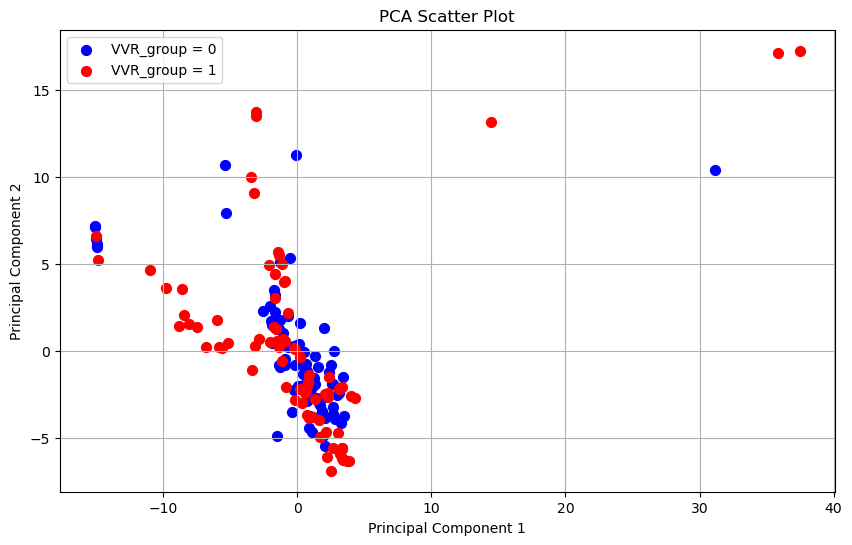

In [42]:
# Plot the data
plt.figure(figsize=(10, 6))
targets = [0, 1]  # VVR_group labels
colors = ['b', 'r']  # Blue for VVR_group = 0, Red for VVR_group = 1
for target, color in zip(targets, colors):
    indices_to_keep = final_df['VVR_group'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'],
                final_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(['VVR_group = 0', 'VVR_group = 1'])
plt.grid(True)
plt.show()

## SMOTE 

In [45]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [46]:
# columns_to_drop = [ 'ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition', 'VVR_1', 'VVR_2'] 
columns_to_drop = [ 'ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition'] 

X = merged_df.drop(columns_to_drop, axis=1)
y = merged_df['VVR_group']

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42, k_neighbors=10)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

new_merged_df = pd.merge(X_res, y_res, how='outer', left_index=True, right_index=True)

# Check the shape of the new merged DataFrame
print('New merged dataset shape:', new_merged_df.shape)



Original dataset shape Counter({0: 85, 1: 26})
Resampled dataset shape Counter({0: 85, 1: 85})
New merged dataset shape: (170, 122)


In [28]:
# Assuming new_merged_df is the DataFrame you want to save
new_merged_df.to_csv('/Users/dionnespaltman/Desktop/V3/train:test:val/new_merged_data.csv', index=False)

## Train test split
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/ 

In [9]:
train, test = train_test_split(new_merged_df, test_size=0.2, random_state=123)
train, val = train_test_split(train, stratify=train['VVR_group'], random_state=123)

# train.drop('Unnamed: 0', axis=1, inplace=True)
# test.drop('Unnamed: 0', axis=1, inplace=True)
# val.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
# train.to_json('/Users/dionnespaltman/Desktop/V3/train:test:val/train.json', orient='records', indent=2)
# test.to_json('/Users/dionnespaltman/Desktop/V3/train:test:val/test.json', orient='records', indent=2)
# val.to_json('/Users/dionnespaltman/Desktop/V3/train:test:val/val.json', orient='records', indent=2)


In [13]:
# Open the JSON file and load its contents
train = pd.read_json('/Users/dionnespaltman/Desktop/V3/train:test:val/train.json')
test = pd.read_json('/Users/dionnespaltman/Desktop/V3/train:test:val/test.json')
val = pd.read_json('/Users/dionnespaltman/Desktop/V3/train:test:val/val.json')


In [14]:
print(train.shape)
display(train.head(5))

(102, 122)


VVR_1     VVR_2  AU01_r__sum_values  AU01_r__variance  \
0   8.00000   8.00000         7386.360000          0.287824   
1  11.00000  11.00000        13901.900000          0.698783   
2   8.00000   8.00000        13389.660000          0.623387   
3  11.00000  11.00000         2626.030000          0.069718   
4  10.47197   9.47197         9574.851915          0.310292   

   AU01_r__standard_deviation  AU01_r__maximum  AU01_r__minimum  AU01_r__mean  \
0                    0.536492         3.750000         0.000000      0.321664   
1                    0.835932         5.000000         0.000000      0.505193   
2                    0.789549         5.000000         0.000000      0.420503   
3                    0.264041         2.670000         0.000000      0.170201   
4                    0.486896         3.911445         0.091369      0.382382   

   AU01_r__mean_abs_change  AU02_r__sum_values  ...  AU26_r__mean  \
0                 0.048513         3672.970000  ...      0.833013   
1                 0.052724         6025.880000  ...      0.728433   
2                 0.038294         7698.450000  ...      0.604497   
3                 0.029826         1213.570000  ...      0.485499   
4                 0.040435         5348.440209  ...      0.725178   

   AU26_r__mean_abs_change  AU45_r__sum_values  AU45_r__variance  \
0                 0.087538        14474.730000          0.871646   
1                 0.081140        16250.110000          0.856558   
2                 0.075130        13119.810000          0.465397   
3                 0.073895         6862.660000          0.763101   
4                 0.070051        14667.317049          1.039244   

   AU45_r__standard_deviation  AU45_r__maximum  AU45_r__minimum  AU45_r__mean  \
0                    0.933620         5.000000         0.000000      0.630350   
1                    0.925504         4.770000         0.000000      0.590527   
2                    0.682200         4.990000         0.000000      0.412028   
3                    0.873557         5.000000         0.000000      0.444790   
4                    0.891066         3.940939         0.120864      0.585459   

   AU45_r__mean_abs_change  VVR_group  
0                 0.075590          0  
1                 0.073053          0  
2                 0.105753          0  
3                 0.074526          0  
4                 0.089912          1  

[5 rows x 122 columns]

In [15]:
print(test.shape)
display(test.head(5))

(34, 122)


VVR_1      VVR_2  AU01_r__sum_values  AU01_r__variance  \
0  13.000000  12.000000        10080.699681      3.081488e-33   
1   9.000000   9.000000         3827.350000      1.184572e-01   
2  13.151086  12.697828         9095.201215      3.367915e-01   
3   9.000000  11.000000         6346.820000      3.263775e-01   
4  11.605158  11.798281        16092.248756      6.294317e-01   

   AU01_r__standard_deviation  AU01_r__maximum  AU01_r__minimum  AU01_r__mean  \
0                5.551115e-17         0.387183         0.387183      0.387183   
1                3.441761e-01         3.810000         0.000000      0.191387   
2                5.655581e-01         5.000000         0.000000      0.343714   
3                5.712946e-01         5.000000         0.000000      0.312190   
4                7.923028e-01         5.000000         0.000000      0.468987   

   AU01_r__mean_abs_change  AU02_r__sum_values  ...  AU26_r__mean  \
0                 0.000000         4827.427886  ...      0.743851   
1                 0.034012         1725.490000  ...      1.026476   
2                 0.045068         4177.574362  ...      1.074934   
3                 0.053038         3296.680000  ...      1.109904   
4                 0.050951         5760.410767  ...      0.907136   

   AU26_r__mean_abs_change  AU45_r__sum_values  AU45_r__variance  \
0                 0.000000        13334.822585          0.000000   
1                 0.095782         4196.810000          0.182862   
2                 0.128395        10523.167973          0.665635   
3                 0.114176        11125.310000          0.841040   
4                 0.125187        22091.597206          1.052882   

   AU45_r__standard_deviation  AU45_r__maximum  AU45_r__minimum  AU45_r__mean  \
0                    0.000000         0.512169         0.512169      0.512169   
1                    0.427624         4.370000         0.000000      0.209861   
2                    0.797572         4.669121         0.000000      0.402666   
3                    0.917082         4.690000         0.000000      0.547236   
4                    0.982045         4.558235         0.000000      0.625780   

   AU45_r__mean_abs_change  VVR_group  
0                 0.000000          0  
1                 0.053974          0  
2                 0.084531          1  
3                 0.081270          1  
4                 0.111774          1  

[5 rows x 122 columns]

In [16]:
print(val.shape)
display(val.head(5))

(34, 122)


VVR_1      VVR_2  AU01_r__sum_values  AU01_r__variance  \
0   8.000000   8.000000         7526.610000          0.855192   
1  12.078182   9.031273         6839.468696          0.296943   
2  10.578674   9.578674        10752.417353          0.288624   
3  15.000000  10.000000        13911.570000          0.930787   
4   8.000000   8.000000        17123.560000          1.294928   

   AU01_r__standard_deviation  AU01_r__maximum  AU01_r__minimum  AU01_r__mean  \
0                    0.924766         5.000000         0.000000      0.477971   
1                    0.544924         4.997811         0.000000      0.298113   
2                    0.452895         3.665341         0.112026      0.382717   
3                    0.964773         5.000000         0.000000      0.604037   
4                    1.137949         5.000000         0.000000      0.661218   

   AU01_r__mean_abs_change  AU02_r__sum_values  ...  AU26_r__mean  \
0                 0.037601         3025.180000  ...      0.331864   
1                 0.036545         3078.467079  ...      2.046326   
2                 0.037612         5859.051801  ...      0.726482   
3                 0.050943         4005.760000  ...      0.779323   
4                 0.042586         7521.490000  ...      0.671385   

   AU26_r__mean_abs_change  AU45_r__sum_values  AU45_r__variance  \
0                 0.052974         6038.500000          0.397545   
1                 0.065802         7650.297683          0.356477   
2                 0.065159        16085.232407          0.966672   
3                 0.088858        10158.120000          0.525558   
4                 0.069372        15141.360000          0.816148   

   AU45_r__standard_deviation  AU45_r__maximum  AU45_r__minimum  AU45_r__mean  \
0                    0.630511         3.620000         0.000000      0.383470   
1                    0.596676         4.182978         0.000000      0.333673   
2                    0.828841         3.701504         0.148189      0.580341   
3                    0.724954         4.040000         0.000000      0.441063   
4                    0.903409         4.480000         0.000000      0.584676   

   AU45_r__mean_abs_change  VVR_group  
0                 0.074761          0  
1                 0.075604          1  
2                 0.083633          1  
3                 0.057725          0  
4                 0.062871          0  

[5 rows x 122 columns]

## Define featurizer 

In [17]:
print(columns_action_units)


['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09_r__

In [20]:
# Adding VVR stage 1 and 2 to the featurizers
columns_au_12 = columns_action_units
# columns_au_12.append('VVR_1')
# columns_au_12.append('VVR_2')
# print(columns_au_12)

featurizer = ColumnTransformer(transformers=[("numeric", StandardScaler(), columns_action_units)], remainder='drop')

# print(featurizer)

## Define models  

In [21]:
# dummy = make_pipeline(featurizer, DummyClassifier(strategy='most_frequent'))
# rf = make_pipeline(featurizer, RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0))
# svm = make_pipeline(featurizer, SVC())
# multiclass_svm = make_pipeline(featurizer, SVC(decision_function_shape='ovr'))
# xgb = make_pipeline(featurizer, XGBClassifier())
# mlp = make_pipeline(featurizer, MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))

# models = {
#     "Dummy": dummy,
#     "RandomForest": rf,
#     "SVM": svm,
#     "Multiclass SVM": multiclass_svm,
#     "XGBoost": xgb,
#     "MLP": mlp
# }


from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

dummy = make_pipeline(featurizer, DummyClassifier(strategy='most_frequent'))
rf = make_pipeline(featurizer, RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0))
svm = make_pipeline(featurizer, SVC())
multiclass_svm = make_pipeline(featurizer, SVC(decision_function_shape='ovr'))
xgb = make_pipeline(featurizer, XGBClassifier())
mlp = make_pipeline(featurizer, MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))
decision_tree = make_pipeline(featurizer, DecisionTreeClassifier())

models = {
    "Dummy": dummy,
    "RandomForest": rf,
    "SVM": svm,
    "Multiclass SVM": multiclass_svm,
    "XGBoost": xgb,
    "MLP": mlp,
    "DecisionTree": decision_tree
}



## Evaluate 

In [36]:
# def evaluate_model(model, X, y):
#     """
#     Evaluate the model's performance
#     """
#     model.fit(X, y)
#     y_probs = model.predict_proba(X)[:, 1]
#     precision = precision_score(y, model.predict(X))
#     recall = recall_score(y, model.predict(X))
#     f1 = f1_score(y, model.predict(X))
#     precision_curve, recall_curve, _ = precision_recall_curve(y, y_probs)
#     auc_pr = auc(recall_curve, precision_curve)
#     cm = confusion_matrix(y, model.predict(X))
    
#     logging.info(f"Precision: {precision}")
#     logging.info(f"Recall: {recall}")
#     logging.info(f"F1-score: {f1}")
#     logging.info(f"AUC-PR score: {auc_pr}")
#     logging.info(f"Confusion Matrix:")
#     logging.info(cm)

## Grid search for Random Forest 

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.01]
}

# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(train.drop('VVR_group', axis=1), train['VVR_group'].values)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_

# Predict on the validation set using the best estimator
pred = best_rf.predict(val.drop('VVR_group', axis=1))

# Calculate metrics
accuracy = accuracy_score(val['VVR_group'].values, pred)
report = classification_report(val['VVR_group'].values, pred)
precision, recall, _ = precision_recall_curve(val['VVR_group'].values, pred)
auc_pr = auc(recall, precision)

# Print results
print(f"Accuracy on Validation Data: {accuracy}")
print(f"AUC-PR on Validation Data: {auc_pr}")
print("Classification Report:")
print(report)


/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10800 fits failed out of a total of 32400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5304 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    val

Best parameters found:  {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on Validation Data: 0.8235294117647058
AUC-PR on Validation Data: 0.8623949579831932
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.86      0.75      0.80        16

    accuracy                           0.82        34
   macro avg       0.83      0.82      0.82        34
weighted avg       0.83      0.82      0.82        34



## Main

In [26]:
# Set logging level to INFO
logging.getLogger().setLevel(logging.INFO)

# merged_df = load_data()
# train, val, test = split_data(merged_df)
# columns_action_units = load_columns()
# featurizer = define_featurizer(columns_action_units)
# models = define_models(featurizer)

# logging.info("Applying SMOTE to handle class imbalance")
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(train.drop('VVR_group', axis=1), train['VVR_group'].values)
# logging.info("X_res, y_res:", X_res.shape, y_res.shape)
# train_resampled = pd.DataFrame(X_res, columns=train.drop('VVR_group', axis=1).columns)
# train_resampled['VVR_group'] = y_res

logging.info("Fitting models")

for name, model in models.items():
    model.fit(train.drop('VVR_group', axis=1), train['VVR_group'].values)
    logging.info(f"Evaluating {name} on validation data")
    pred = model.predict(val.drop('VVR_group', axis=1))
    accuracy = accuracy_score(val['VVR_group'].values, pred)
    report = classification_report(val['VVR_group'].values, pred)
    
    # Calculating Precision-Recall curve and its AUC
    precision, recall, _ = precision_recall_curve(val['VVR_group'].values, pred)
    auc_pr = auc(recall, precision)

    logging.info(f"{name} Accuracy: {accuracy}")
    logging.info(f"{name} AUC-PR: {auc_pr}")  # Including AUC-PR in logging
    logging.info(f"{name} Classification Report:")
    logging.info(report)
    logging.info(f"{name} Confusion Matrix:")
    logging.info(cm)

best_model_name = max(models, key=lambda x: accuracy_score(val['VVR_group'].values, models[x].predict(val.drop('VVR_group', axis=1))))
best_model = models[best_model_name]

logging.info(f"Predicting on test using best model: {best_model_name}")

pred = best_model.predict(test.drop('VVR_group', axis=1))

accuracy = accuracy_score(test['VVR_group'].values, pred)
report = classification_report(test['VVR_group'].values, pred)
cm = confusion_matrix(test['VVR_group'].values, pred)

logging.info(f"{best_model_name} Accuracy on Test Data: {accuracy}")
logging.info(f"{best_model_name} Classification Report on Test Data:")
logging.info(report)
logging.info(f"{best_model_name} Confusion Matrix:")
logging.info(cm)


INFO:root:Fitting models


INFO:root:Evaluating Dummy on validation data
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

## ... 

## ... 